<a href="https://colab.research.google.com/github/PsorTheDoctor/pybullet/blob/master/notebooks/static_manipulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Static manipulator: Hardware OpenGL3 rendering

In [1]:
%%time
!pip install -q pybullet

     |████████████████████████████████| 89.3 MB 28 kB/s 
CPU times: user 301 ms, sys: 54.6 ms, total: 355 ms
Wall time: 16.4 s


In [6]:
import os
os.environ['MESA_GL_VERSION_OVERRIDE'] = '3.3'
os.environ['MESA_GLSL_VERSION_OVERRIDE'] = '330'
import pybullet as p
import pybullet_data as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline
p.connect(p.DIRECT)
p.setAdditionalSearchPath(pd.getDataPath())
enableGPU = False
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
import GPUtil as GPU
import sys

print('OS: ' + sys.platform)
print(sys.version)
print(GPU.__name__ + ' ' + GPU.__version__) 

GPU.showUtilization(all=True)
GPUs = GPU.getGPUs()
numGPUs = len(GPUs)
print('Num GPUs:', numGPUs)

if numGPUs > 0:
  enableGPU = True
eglPluginId = -1
if enableGPU:
  import pkgutil
  egl = pkgutil.get_loader('eglRenderer')
  if egl:
    eglPluginId = p.loadPlugin(egl.get_filename(), '_eglRendererPlugin')
  else:
    eglPluginId = p.loadPlugin('_eglRendererPlugin')

if eglPluginId >= 0:
  print('Using GPU hardware (eglRenderer)')
else:
  print('Using GPU hardware (TinyRenderer)')

OS: linux
3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
GPUtil 1.4.0
| ID | Name | Serial | UUID || GPU temp. | GPU util. | Memory util. || Memory total | Memory used | Memory free || Display mode | Display active |
--------------------------------------------------------------------------------------------------------------------------------------------------
Num GPUs: 0
Using GPU hardware (TinyRenderer)


In [ ]:
!git clone https://github.com/bulletphysics/bullet3.git

In [13]:
%cd bullet3/data

/content/bullet3/data


In [25]:
p.resetSimulation()
p.configureDebugVisualizer(p.COV_ENABLE_GUI)
useFixedBase = True
flags = p.URDF_INITIALIZE_SAT_FEATURES

plane_pos = [0, 0, -0.625]
plane = p.loadURDF('plane.urdf', plane_pos, flags=flags, useFixedBase=useFixedBase)

table_pos = [0, 0, -0.625]
table = p.loadURDF('table/table.urdf', table_pos, flags=flags, useFixedBase=useFixedBase)

xarm = p.loadURDF('xarm/xarm6_robot.urdf', flags=flags,  useFixedBase=useFixedBase)

,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


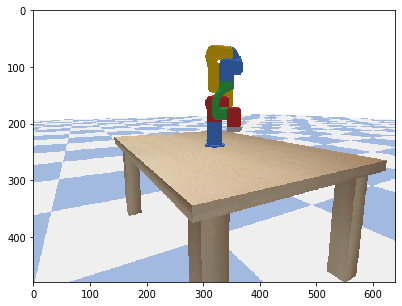

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


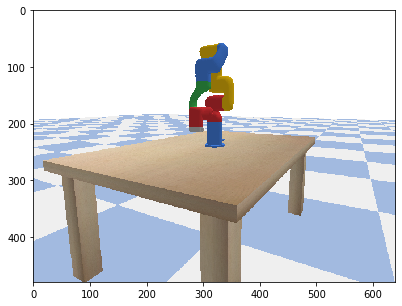

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


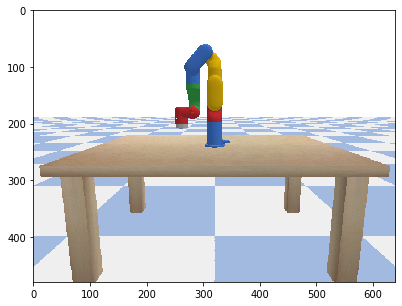

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


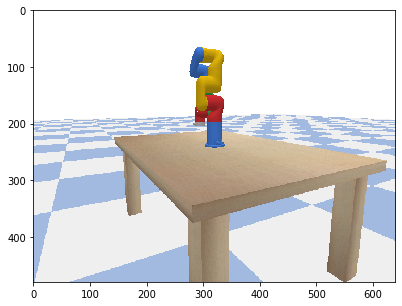

<IPython.core.display.Javascript object>

CPU times: user 1.66 s, sys: 50.5 ms, total: 1.71 s
Wall time: 1.78 s


In [22]:
%%time
camTargetPos = [0, 0, 0]
cameraUp = [0, 0, 1]
cameraPos = [1, 1, 1]
p.setGravity(0, 0, 10)

from google.colab import widgets
import random
import time

grid = widgets.Grid(2, 2)
yaw = 0
for r in range(2):
  for c in range(2):
    yaw += 60
    with grid.output_to(r, c):
      grid.clear_cell()
      pylab.figure(figsize=(10, 5))
      pitch = -10.0
      roll = 0
      upAxisIndex = 2
      camDistance = 1.5
      width = 640
      height = 480
      nearPlane = 0.01
      farPlane = 100
      fov = 60
      viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch,
                                                       roll, upAxisIndex)
      aspect = width / height
      projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)

      img_arr = p.getCameraImage(width, height, viewMatrix, projectionMatrix)
      rgb = img_arr[2]
      dep = img_arr[3]
      print('w=', width, 'h=', height)
      np_img_arr = np.reshape(rgb, (height, width, 4))
      np_img_arr = np_img_arr * (1. / 255.)
      pylab.imshow(np_img_arr, interpolation='none', animated=True, label='pybullet')

Creating animated png, please wait about 5 seconds
CPU times: user 4.6 s, sys: 6.6 ms, total: 4.6 s
Wall time: 4.6 s
CPU times: user 0 ns, sys: 681 µs, total: 681 µs
Wall time: 686 µs


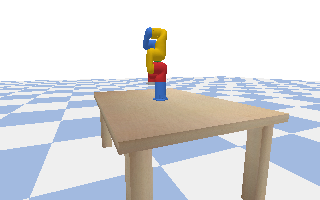

In [23]:
!pip install -q numpngw
from numpngw import write_apng
from IPython.display import Image

frames = []
for r in range(60):
  yaw += 6
  pitch = -10.0
  roll = 0
  upAxisIndex = 2
  camDistance = 1.5
  width = 320
  height = 200
  nearPlane = 0.01
  farPlane = 100
  fov = 60
  viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch,
                                                       roll, upAxisIndex)
  aspect = width / height
  projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)

  img_arr = p.getCameraImage(width, height, viewMatrix, projectionMatrix)
  rgb = img_arr[2]
  dep = img_arr[3]
  np_img_arr = np.reshape(rgb, (height, width, 4))
  frame = np_img_arr[:, :, :3]
  frames.append(frame)
print('Creating animated png, please wait about 5 seconds')
%time write_apng('example6.png', frames, delay=100)
%time Image(filename='example6.png')